The SIR model for disease

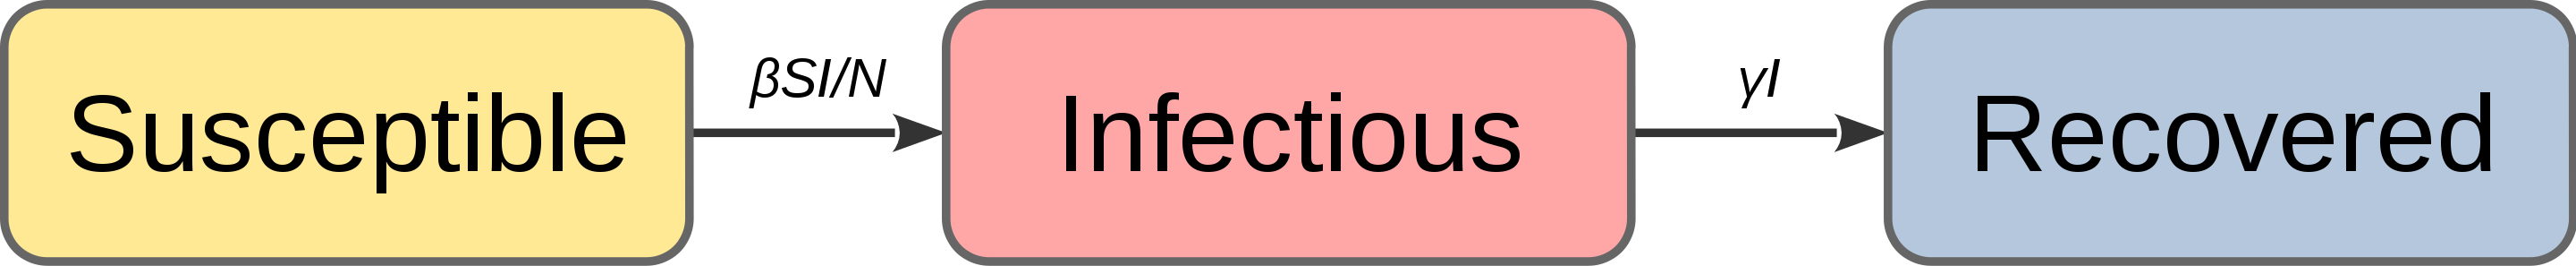

$$ \frac{dS}{dt} = \left(-\frac{\beta}{N}\right) \cdot SI \hspace{20mm} \frac{dI}{dt} = \left(\frac{\beta}{N}\right) \cdot SI - \left(\gamma\right) \cdot I \hspace{20mm} \frac{dR}{dt} = (\gamma) \cdot I $$




In [288]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Let $A = (S, I, R)$. Need to define function that takes in $A$ and $t$ and returns $dA/dt = (dS/dt, dI/dt, dR/dt)$

In [289]:
def dAdt(A, t, beta, gamma, N):
    S = A[0]
    I = A[1]
    R = A[2]
    return [
        -beta/N * S * I,
        beta/N * S * I - gamma * I,
        gamma*I
    ]

Solve the model equations for 
* $\gamma = 1/10~\mathrm{ days^{-1}}$  
* $N=1.1\times10^7$
* $\beta = 0.39~$days$^{-1}$
* $(S_0, I_0, R_0) = (N-I_0, 574,0)$ 

These are the parameters that describe approximately the situation of the Corona virus infection in China, focussing on the city of Wuhan, on January 22 2020.

In [290]:
times = np.arange(0, 22, 1)
gamma = .107
N = 10200000
beta = .112*4
S0, I0, R0 = 8761220, 443570, 995210
sol = odeint(dAdt, y0=[S0, I0, R0], t=times, args=(beta, gamma, N))

In [291]:
S = sol.T[0]
I = sol.T[1]
R = sol.T[2]

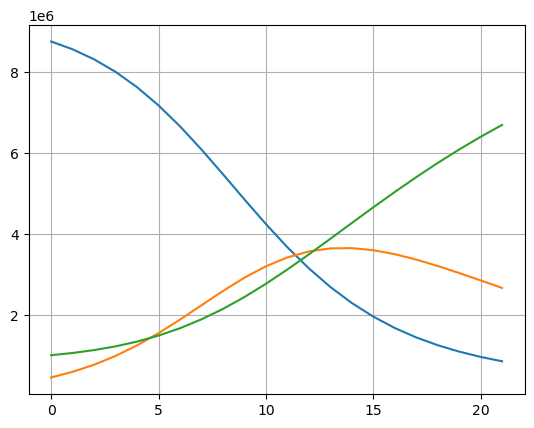

In [292]:
plt.plot(times, S)
plt.plot(times, I)
plt.plot(times, R)
plt.grid()

The rate of hospitalizations is 5\% of $dR/dt$ and people stay in the hospital for 3 days on average. Find the number of people in the hosptial as a function of time.

In [293]:
ha = 0.05 * gamma * I

In [294]:
h = ha + np.insert(ha, 0, np.zeros(1))[:-1] + np.insert(ha, 0, np.zeros(2))[:-2]

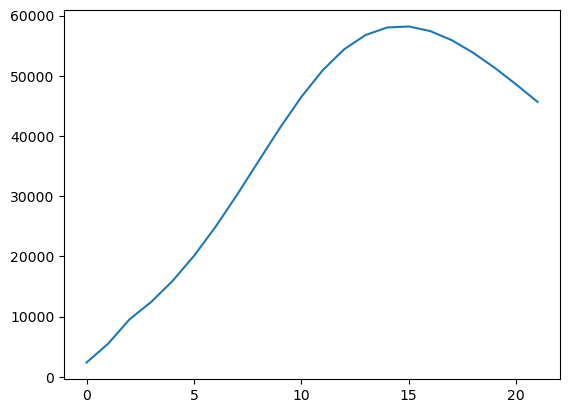

In [295]:
plt.plot(times, h)